 # QT Assignment 4 - Study of propagation model and application to mid-point series.

In [2]:
!pip install fbm

## Question 1

Use the Python fbm library to generate a timeseries of signs with long memory. Specifically the autocorrelation decays as  $${C \sim l^{-\gamma}}$$ Estimate the exponent γ.   

### Generation a Fractional Brownian Motion

In [3]:
import numpy as np
import scipy
import scipy.stats as sps
import matplotlib.pyplot as plt
from fbm import FBM

# Set the parameters
hurst_exponent = 0.75
length = 100000  # Length of the time series

# Generate an object that models a fractional Brownian motion with long memory.
f = FBM(n=length, hurst=hurst_exponent, length=length, method='daviesharte')

# Generate a realization of the FBM and store it.
time_series_long_memory = f.fbm()

# Create a time series consisting of the increments of the FBM.
increments = np.diff(time_series_long_memory)

# Create a series informing on the direction of each increments of the FBM.
sign_series = np.sign(increments)

### Estimation of the hurst exponent 

In [4]:
# We compute the autocorrelation function for the increment and the signed series of increments.
# We then estimate gamma as the exponent of a power-law decay fitted to the autocorrelation values.

def func(x, gamma) :
    """
    Power function with exponent minus gamma.

    Input:
        - x ; float
        - gamma ; float
    
    Output: x**(-gamma) ; float
    """
    return x**(-gamma)

#Compute the empirical autocorrelation function
autocorr = [0] * 99
for c in range(1,100) :
    test = sign_series[:-c]
    test_incr = sign_series[c:]
    autocorr[c-1] = sps.pearsonr(test,test_incr)[0]

# Set list to describe the empirical autocorrelation function
xdata = autocorr
ydata = np.arange(2,101,1)

# Compute gamma
gamma = scipy.optimize.curve_fit(func, xdata, ydata)[0][0]
print(gamma)

1.1141318360874857


Hence, the estimated gamma from our sign sequence is 1.1120800720127988

### Verification : we compare our approximation with the generated data, we expect a good fit

In [5]:
compare = [0]*99
for i in range(1,100) :
    compare[i-1] = func(i+1, 1.024690977609572)

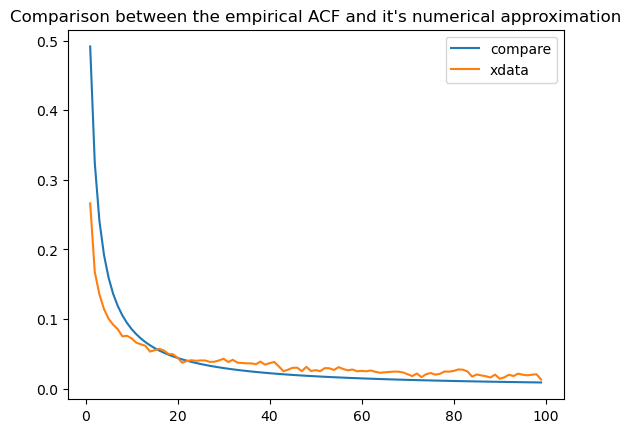

In [6]:
plt.figure()
plt.plot(np.arange(1,100,1), compare)
plt.plot(np.arange(1,100,1), xdata)
plt.legend(["compare", "xdata"])
plt.title("Comparison between the empirical ACF and it's numerical approximation")
plt.show()

## Question 2

Generate now an artificial series of mid-point prices using a propagator model, where ɛ is the generated time series and ξ is a random noise.
$$
m_t = m_{t_0} + \sum_{t_0≤n<t}  G(t - n) ɛ_n + \sum_{t_0≤n<t} ξ_n
$$

Take for G a power-law kernel as follows: 
$$ G(t) = (t + 1)^{-\beta} $$

In [7]:
def G(t, beta=0.3):
    return (t + 1)**(-beta)

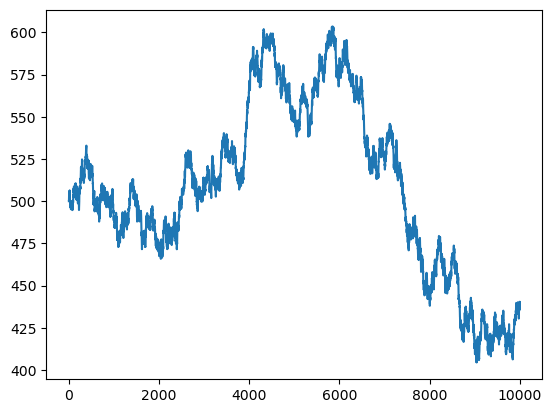

In [8]:
#Generation of a serie of mid-point prices
mid_points_03 = np.zeros(10000)
# Initiate the first value
mid_points_03[0] = 500
# Add noise
noise = np.random.normal(loc=0, scale=1, size = 10000)
# Create the propagation variable (applied to every mid points except the last)
g=np.zeros(10000-1)

# Assign values
for i in range(10000-1):
    g[i] = G(i)

# Apply the propagator model formula to compute the mid-point serie.
for t in range(len(mid_points_03)-1) : 
    s=0
    for n in range(t) :
        s+= g[t-n] * sign_series[n]
    mid_points_03[t+1] = mid_points_03[0] + s + np.sum(noise[:t])

plt.plot(np.arange(1, len(mid_points_03)+1,1), mid_points_03)

## Question 3

Estimate the Hurst exponent of the price series (by performing a linear regression of the variagram in log-log scale) for three values of β: β=0.2, β=0.25 and β=-0.3.
What is your observation?

1. We generate the mid points series for each of the betas

1.a Generate the mid-point serie with $\beta = 0.2$

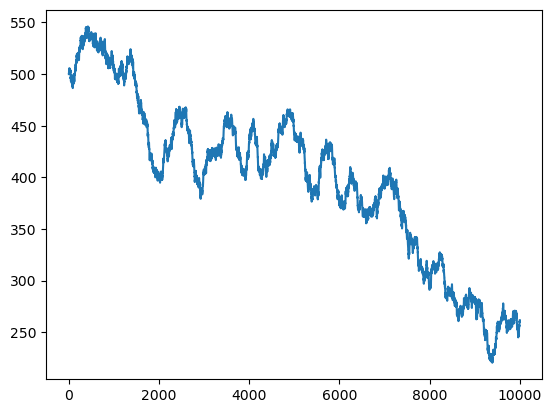

In [9]:
mid_points_02 = np.zeros(10000)
mid_points_02[0] = 500
noise = np.random.normal(loc=0, scale=1, size = 10000)
g=np.zeros(10000-1)
for i in range(10000-1):
    g[i] = G(i,0.2)
for t in range(len(mid_points_02)-1) : 
    s=0
    for n in range(t) :
        s+= g[t-n] * sign_series[n]
    mid_points_02[t+1] = mid_points_02[0] + s + np.sum(noise[:t])

plt.plot(np.arange(1, len(mid_points_02)+1,1), mid_points_02)

1.b Generate the mid-point serie with $\beta = 0.25$

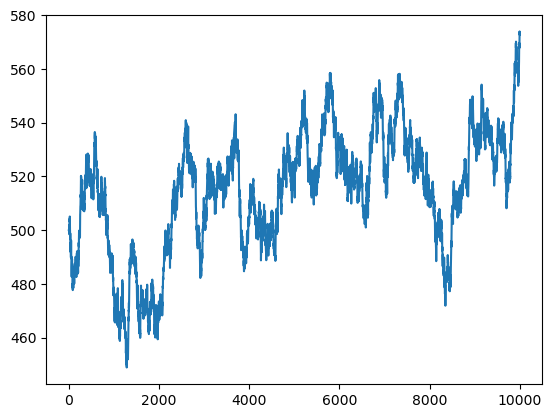

In [10]:
mid_points_025 = np.zeros(10000)
mid_points_025[0] = 500
noise = np.random.normal(loc=0, scale=1, size = 10000)
g=np.zeros(10000-1)
for i in range(10000-1):
    g[i] = G(i,0.25)
for t in range(len(mid_points_025)-1) : 
    s=0
    for n in range(t) :
        s+= g[t-n] * sign_series[n]
    mid_points_025[t+1] = mid_points_025[0] + s + np.sum(noise[:t])

plt.plot(np.arange(1, len(mid_points_025)+1,1), mid_points_025)

1.c Generate the mid-point serie with $\beta = 0.3$

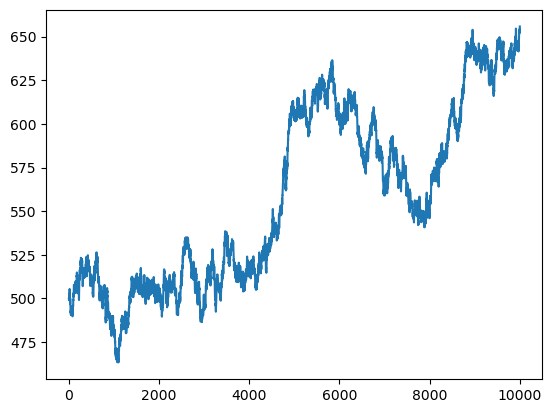

In [11]:
mid_points_m03 = np.zeros(10000)
mid_points_m03[0] = 500
noise = np.random.normal(loc=0, scale=1, size = 10000)
g=np.zeros(10000-1)
for i in range(10000-1):
    g[i] = G(i,0.3)
for t in range(len(mid_points_m03)-1) : 
    s=0
    for n in range(t) :
        s+= g[t-n] * sign_series[n]
    mid_points_m03[t+1] = mid_points_m03[0] + s + np.sum(noise[:t])

plt.plot(np.arange(1, len(mid_points_m03)+1,1), mid_points_m03)

2. Estimation of the Hurst coefficient for each beta.

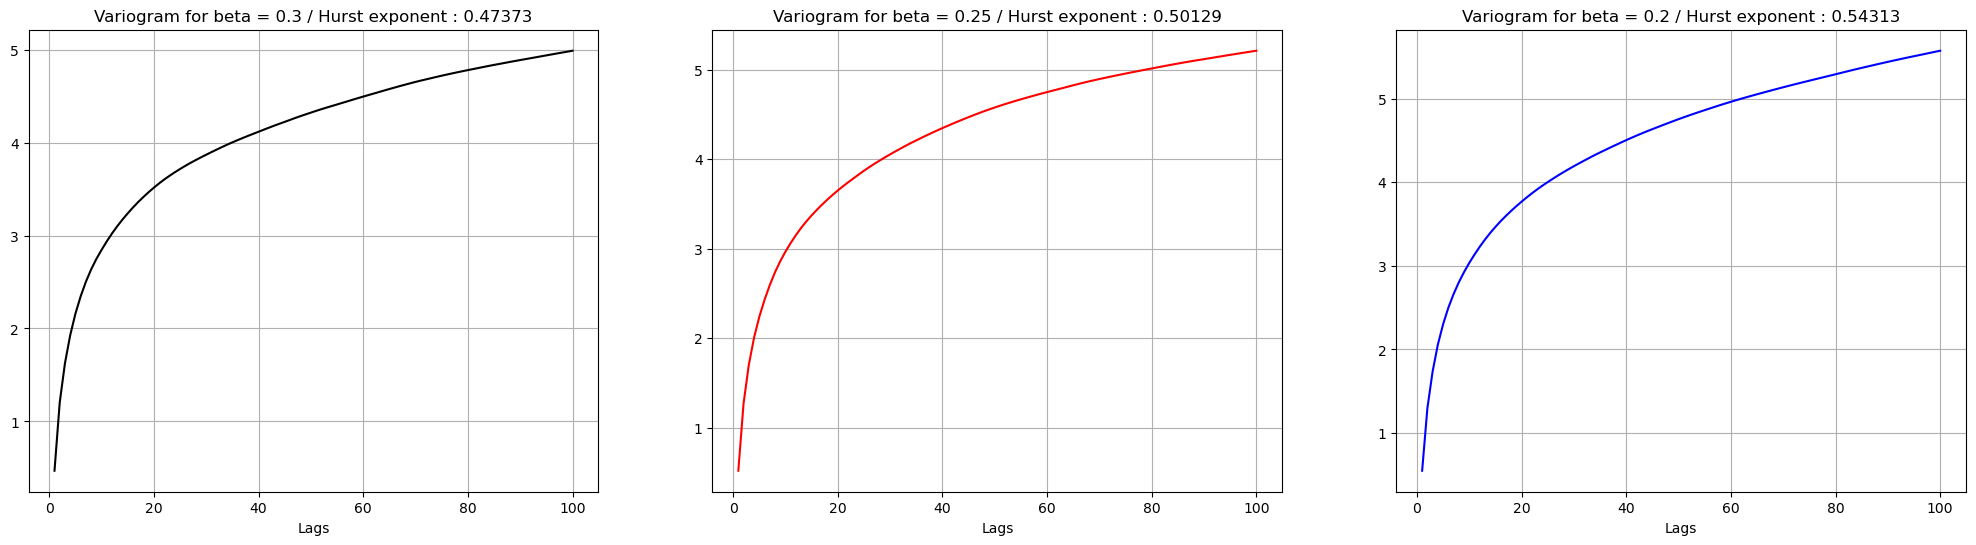

In [13]:
from scipy.stats import linregress

# Get the length of the time series mid_points_m03 (used as reference for alignment)
N = len(mid_points_m03)

# List to store the estimated Hurst exponents for each series
hurst_exponents = []

# Initialize three empty variograms (100 lags each) for three different time series
variogramB1 = [0]*100
variogramB2 = [0]*100
variogramB3 = [0]*100

# Compute empirical variograms for lags 1 to 100
for lag in range(1,101) :
    # Variogram for mid_points_02 (beta = 0.2)
    variogramB1[lag-1] = np.mean((mid_points_02[:N-lag] - mid_points_02[lag:])**2)
    # Variogram for mid_points_025 (beta = 0.25)
    variogramB2[lag-1] = np.mean((mid_points_025[:N-lag] - mid_points_025[lag:])**2)
    # Variogram for mid_points_03 (beta = 0.3)
    variogramB3[lag-1] = np.mean((mid_points_m03[:N-lag] - mid_points_m03[lag:])**2)

# Estimate Hurst exponents from the slope of the log-log plot of the variogram
# We use: log(variogram) ≈ 2H * log(lag) + constant ⇒ H ≈ slope / 2
hurst_exponents.append(linregress(2*np.log(np.arange(1,101)), np.log(variogramB1))[0])
hurst_exponents.append(linregress(2*np.log(np.arange(1,101)), np.log(variogramB2))[0])
hurst_exponents.append(linregress(2*np.log(np.arange(1,101)), np.log(variogramB3))[0])

# Create a wide figure to display the three variogram plots side by side
plt.figure(figsize=(25,6))

# Plot 1: Variogram for beta = 0.3
plt.subplot(1,3,1)
plt.grid(True)
plt.xlabel("Lags")
plt.title(f"Variogram for beta = 0.3 / Hurst exponent : {round(hurst_exponents[2],5)}")
plt.plot(np.arange(1,101),np.log(variogramB3), color = 'k')


# Plot 2: Variogram for beta = 0.25
plt.subplot(1,3,2)
plt.grid(True)
plt.xlabel("Lags")
plt.title(f"Variogram for beta = 0.25 / Hurst exponent : {round(hurst_exponents[1],5)}")
plt.plot(np.arange(1,101),np.log(variogramB2), color = "r")


# Plot 3: Variogram for beta = 0.2
plt.subplot(1,3,3)
plt.grid(True)
plt.xlabel("Lags")
plt.title(f"Variogram for beta = 0.2 / Hurst exponent : {round(hurst_exponents[0],5)}")
plt.plot(np.arange(1,101),np.log(variogramB1), color = "b")

plt.show()